# 1. Initial Inspection

- Check value types, NaN-values
- Distributions (range, outlieres, etc.)
- Simple correlation
- Plot data

In [134]:
import pandas as pd

df = pd.read_csv("../../data/" + "MICDEV001_2019-04-13_2020-01-24.csv")
df["datetime"] = pd.to_datetime(df["datetime"])

df.head()

,datetime,heating_temperature,cooling_temperature
0,2019-04-13 17:51:16,33.3,15.0
1,2019-04-13 18:51:18,34.0,NaN
2,2019-04-13 19:51:20,33.8,NaN
3,2019-04-13 20:51:21,34.2,NaN
4,2019-04-13 21:51:23,34.5,NaN


In [135]:
df.describe()

,heating_temperature,cooling_temperature
count,699.000000,301.000000
mean,33.075393,21.295681
std,3.363579,6.763378
min,21.700000,14.900000
25%,32.500000,15.000000
50%,34.200000,20.800000
75%,34.800000,28.500000
max,39.400000,33.600000


In [136]:
df.isna().sum()

datetime                 0
heating_temperature     17
cooling_temperature    415
dtype: int64

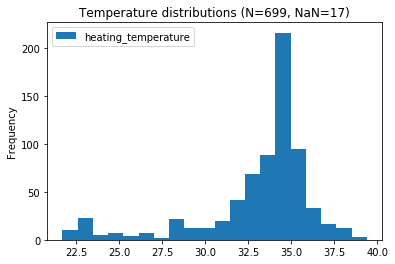

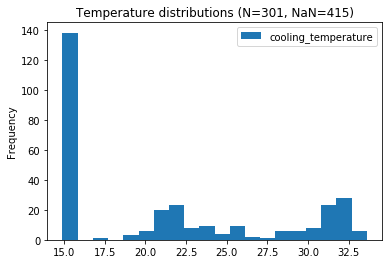

In [137]:
N_df = len(df)
nan_hT = df["heating_temperature"].isna().sum()
nan_cT = df["cooling_temperature"].isna().sum()
df[['heating_temperature']].plot.hist(bins = 20, title = f'Temperature distributions (N={N_df-nan_hT}, NaN={nan_hT})')
df[['cooling_temperature']].plot.hist(bins = 20, title = f'Temperature distributions (N={N_df-nan_cT}, NaN={nan_cT})')

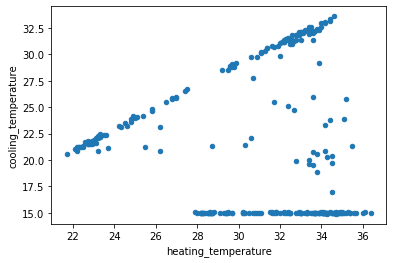

In [138]:
df.plot.scatter(x = 'heating_temperature', y = 'cooling_temperature')

Distributions of heating/cooling temperature, when the other value is NaN

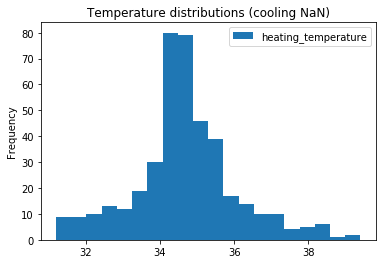

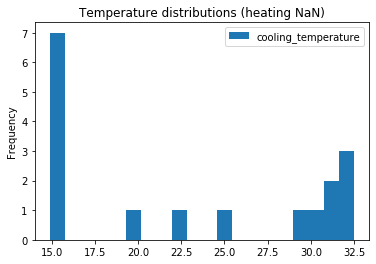

In [139]:
df[df['cooling_temperature'].isnull()][['heating_temperature']].plot.hist(bins = 20, title = 'Temperature distributions (cooling NaN)')
df[df['heating_temperature'].isnull()][['cooling_temperature']].plot.hist(bins = 20, title = 'Temperature distributions (heating NaN)')

<div class="alert alert-block alert-info">
<b>Note:</b> When cooling is NaN then heating temperature is a well-defined distribution ~ 35 °C.
</div>

Standard pearson correlation of temperature values (ignoring NaN)

In [140]:
corr = df.corr()
corr

,heating_temperature,cooling_temperature
heating_temperature,1.000000,-0.059089
cooling_temperature,-0.059089,1.000000


Plot raw data

In [141]:
import plotly.express as px

fig = px.line(df, x='datetime', y=["heating_temperature","cooling_temperature"])
fig.show()

Plot without time information

In [142]:
import plotly.express as px

fig = px.line(df, y=["heating_temperature","cooling_temperature"])
fig.show()

Zoom into data

In [143]:
import ipywidgets
from ipywidgets import widgets
from IPython.display import display,clear_output
import datetime
import plotly.express as px

# === PLOTTING ===
start_year = 2019
start_month = 5
trace_idx = 0  #start trace

out=widgets.Output()
info = widgets.Output()

# Plot first traces
with info:
    start = datetime.datetime(start_year+((trace_idx+start_month)//12),(trace_idx+start_month)%12,1)
    end = datetime.datetime(start_year+((trace_idx+start_month+1)//12),(trace_idx+start_month+1)%12,1)
    print("Date {0} - {1}".format(start,end))    
with out:
    fig = px.line(df, x='datetime', y=["heating_temperature","cooling_temperature"])
    start_date = start.strftime('%Y-%m-%d')
    end_date = end.strftime('%Y-%m-%d')
    fig.update_xaxes(type="date", range=[start_date, end_date])
    fig.show()

# Arrange output (buttons + text + plot)
b_prev=widgets.Button(description='Previous')
b_next=widgets.Button(description='Next')
hbox = widgets.HBox(children=(b_prev,b_next,info))
vbox=widgets.VBox(children=(hbox,out))
display(vbox)

# Define button events (recalculate trace plots)
def click(direction):
    global trace_idx
    if direction=='next':
        trace_idx += 1
    elif direction=='back':
        trace_idx -= 1
    else:
        raise Exception("Command not defined")
    with info:
        clear_output(wait=True)
        start = datetime.datetime(start_year+((trace_idx+start_month-1)//12),(trace_idx+start_month-1)%12+1,1)
        end = datetime.datetime(start_year+((trace_idx+start_month)//12),(trace_idx+start_month)%12+1,1)
        print("Date {0} - {1}".format(start,end))  
    with out:
        clear_output()
        fig = px.line(df, x='datetime', y=["heating_temperature","cooling_temperature"])
        start_date = start.strftime('%Y-%m-%d')
        end_date = end.strftime('%Y-%m-%d')
        fig.update_xaxes(type="date", range=[start_date, end_date])
        fig.show()
def click_p(b):
    click('back')
def click_n(b):
    click('next')    
b_prev.on_click(click_p)
b_next.on_click(click_n)

# 2. Inspect Time Axis
- Periodicity
- Jumps / missing values
- delta-T distribution

In [144]:
import numpy as np

df["delta_T"] = df["datetime"].diff() / np.timedelta64(1, 's')

pd.set_option('display.max_rows', None)

df.head(50)

,datetime,heating_temperature,cooling_temperature,delta_T
0,2019-04-13 17:51:16,33.3,15.0,NaN
1,2019-04-13 18:51:18,34.0,NaN,3602.0
2,2019-04-13 19:51:20,33.8,NaN,3602.0
3,2019-04-13 20:51:21,34.2,NaN,3601.0
4,2019-04-13 21:51:23,34.5,NaN,3602.0
5,2019-04-13 22:51:25,34.7,NaN,3602.0
6,2019-04-13 23:51:26,34.8,NaN,3601.0
7,2019-04-14 00:51:28,34.9,NaN,3602.0
8,2019-04-14 01:51:30,35.0,NaN,3602.0
9,2019-04-14 06:51:38,35.1,NaN,18008.0


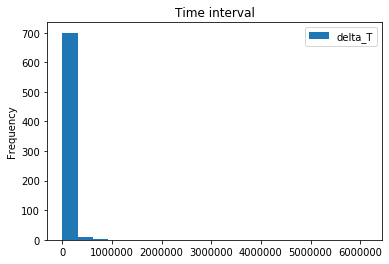

In [145]:
df[['delta_T']].plot.hist(bins = 20, title = f'Time interval')

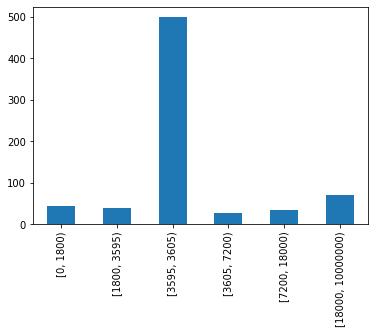

In [146]:
bin_range = np.array([0,1800,3595,3605,7200,18000,10000000])
out, bins  = pd.cut(df['delta_T'], bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar()

<div class="alert alert-block alert-info">
<b>Note:</b> Most time intervals are ~3600 s (deviation to smaller and much larger values posible).
</div>

# 3. Seasonality
- Yearly, monthly, weekly, daily

In [170]:
df['month'] = df['datetime'].apply(lambda x: x.month)
dfmonth = df.groupby(pd.Grouper(key='month')).mean()

dfmonth.sort_index(inplace=True)
fig = px.line(dfmonth, y=["heating_temperature","cooling_temperature"])
fig.show()

In [168]:
import plotly.express as px

df['hour'] = df['datetime'].apply(lambda x: x.hour)
dfday = df.groupby(pd.Grouper(key='hour')).mean()
dfday.sort_index(inplace=True)
fig = px.line(dfday, y=["heating_temperature","cooling_temperature"])
fig.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Seasonality not relevant at first place.
</div>

## 4. Summary
- Gaps in time and temperature values (especially cooling temp.) are too large and frequent for any data interpolation to fill gaps
- Any Fourier-transform based or (auto-)correlation based evaluation in the time domain is not possible due to unregular data points
- Time variable (delta-t) is highly unbalanced 80% confined, 20% widely spread (maybe log transformation, or conversion to binary data)
- There are clear patterns:
    - mostly two consecutive non-NaN-cooling temperatures after iregular delta-t
    - two patterns in heating/cooling scattering plot (hT ~ cT +2 °C and constant cT ~ 15°C)
- Seasonality rather unimportant
- Hypothesis: Only previous values determine the next ones